In [2]:
from collections import defaultdict as ddict, OrderedDict as odict
from typing import Any, Dict, List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem import PandasTools, AllChem as Chem, Descriptors
from rdkit.Chem.Descriptors import MolWt
from sklearn.ensemble import RandomForestRegressor
import sklearn
from rdkit.Chem.rdmolops import GetFormalCharge
import torch
import deepchem as dc
import copy
from sklearn.model_selection import train_test_split
from hyperopt import hp
import imp
import copy


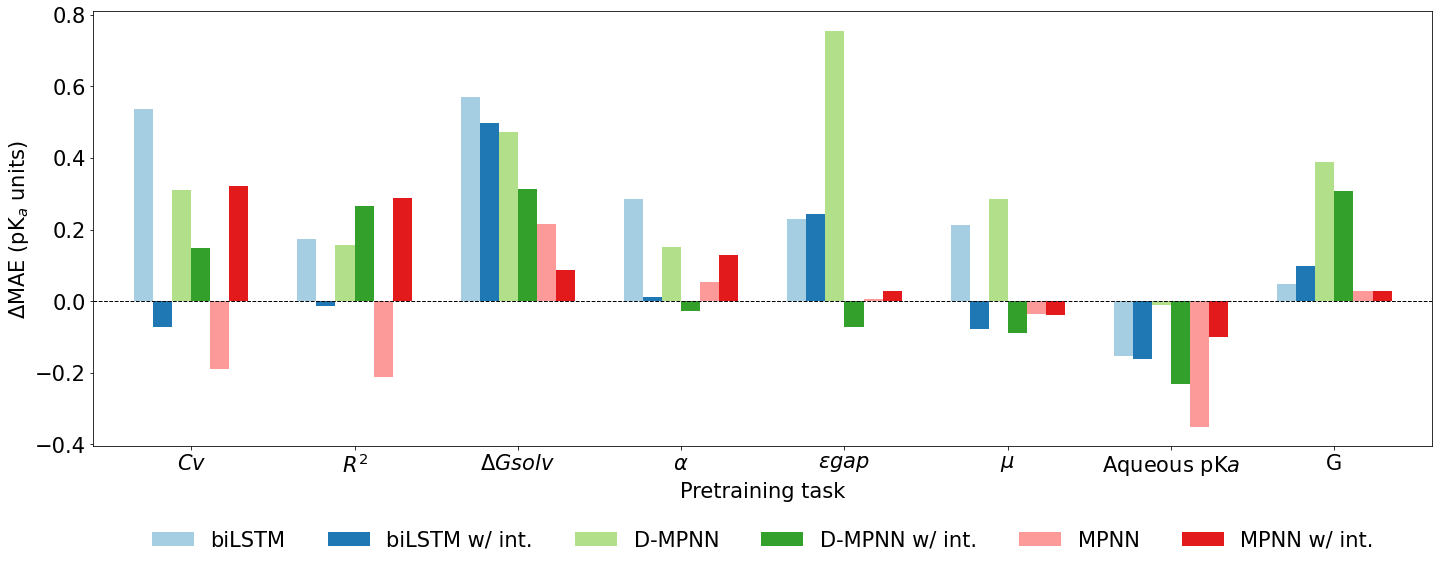

In [182]:
#finetuning
df = pd.read_csv('finalised_results/holdout_test_n2.csv')
df = df.replace({'_':' ','RNN':'biLSTM','DMPNN':'D-MPNN', 'Water':'Aqueous', 'with attention':'w/ int.'}, regex=True)
df_pivot = pd.pivot_table(df, values="relative MAE", index="Pretraining task", columns="Model")
cols = list(df_pivot.columns.values)
df_pivot = df_pivot[sorted(cols, key=str.lower)]

colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
           '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#FAE318','#b15928']

ax = df_pivot.plot.bar(color=colours, width=0.7)
fig = ax.get_figure()
fig.set_size_inches(24, 8)
ax.set_xlabel("Pretraining task")
ax.set_ylabel("$\Delta$MAE (pK$_a$ units)")
ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.xticks(rotation=0)

plt.rc("font", size=21)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=False, ncol=6, frameon=False)
plt.savefig('TL_holdout.pdf', bbox_inches='tight')
plt.show()

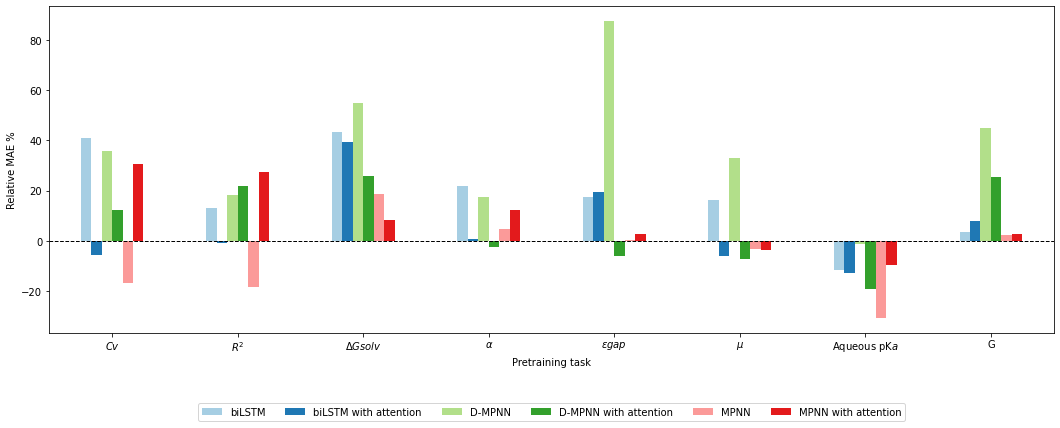

In [209]:
#finetuning
df = pd.read_csv('finalised_results/holdout_test_n2.csv')
df = df.replace({'_':' ','RNN':'biLSTM','DMPNN':'D-MPNN', 'Water':'Aqueous'}, regex=True)
df_pivot = pd.pivot_table(df, values="relative MAE %", index="Pretraining task", columns="Model")
cols = list(df_pivot.columns.values)
df_pivot = df_pivot[sorted(cols, key=str.lower)]

colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
           '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#FAE318','#b15928']

ax = df_pivot.plot.bar(color=colours, width=0.7)
fig = ax.get_figure()
fig.set_size_inches(18, 6)
ax.set_xlabel("Pretraining task")
ax.set_ylabel("Relative MAE %")
ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.xticks(rotation=0)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=False, ncol=6)
plt.savefig('TL_holdout_perc.png', bbox_inches='tight')
plt.show()

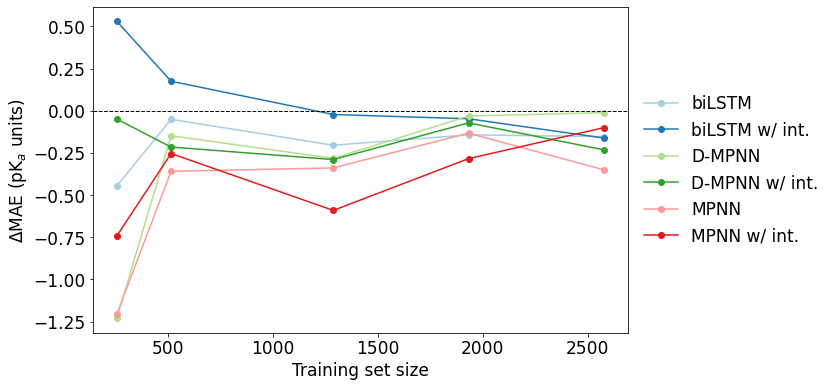

In [127]:
#train_prop_test
df = pd.read_csv('finalised_results/train_prop_test_n2.csv')
df = df.replace({'_':' ','RNN':'biLSTM','DMPNN':'D-MPNN', 'Water':'Aqueous', 'with attention':'w/ int.'}, regex=True)
df_pivot = pd.pivot_table(df, values="relative MAE", index="Train size", columns="Model")
cols = list(df_pivot.columns.values)
df_pivot = df_pivot[sorted(cols, key=str.lower)]

ax = df_pivot.plot(color=colours, style='-o')
fig = ax.get_figure()
fig.set_size_inches(12, 6)
ax.set_xlabel("Training set size")
ax.set_ylabel("$\Delta$MAE (pK$_a$ units)")

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
plt.rc("font", size=17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, prop={'size':17})
ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.savefig('TL_prop.pdf',bbox_inches='tight')
plt.show()

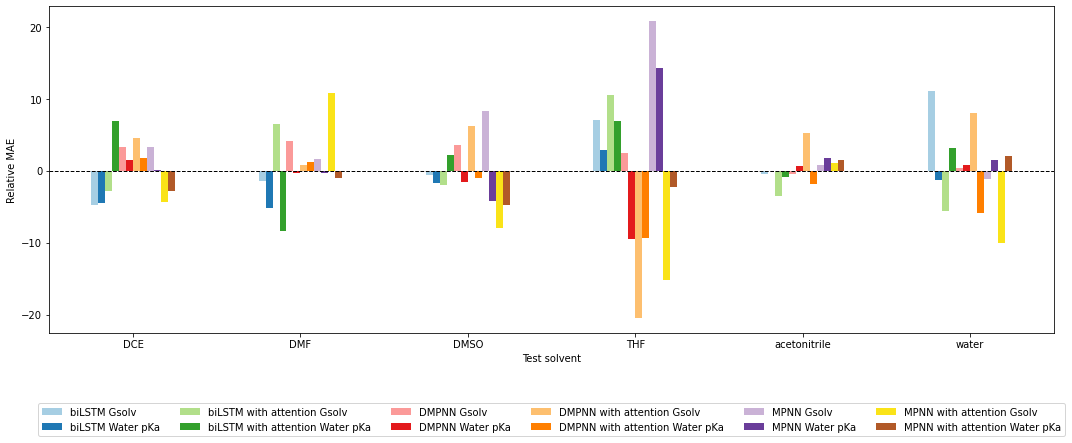

In [102]:
#LOSO
df = pd.read_csv('results/LOSO_test.csv')
df = df.replace({'RNN':'biLSTM'}, regex=True)
solvent_name_key = {"CS(=O)C":"DMSO","CC#N":"acetonitrile","C(CCl)Cl":"DCE","CN(C)C=O":"DMF","C1CCOC1":"THF","O":"water"}
df = df.replace(solvent_name_key)

df_pivot = pd.pivot_table(df, values="relative MAE", index="LOSO solvent", columns="Model")
cols = list(df_pivot.columns.values)
df_pivot = df_pivot[sorted(cols, key=str.lower)]

colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
           '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#FAE318','#b15928']

ax = df_pivot.plot.bar(color=colours, linewidth=5)
fig = ax.get_figure()
fig.set_size_inches(18, 6)
ax.set_xlabel("Test solvent")
ax.set_ylabel("Relative MAE")
plt.xticks(rotation=0)

ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=False, ncol=6)
plt.savefig('TL_LOSO.png', bbox_inches='tight')
plt.show()

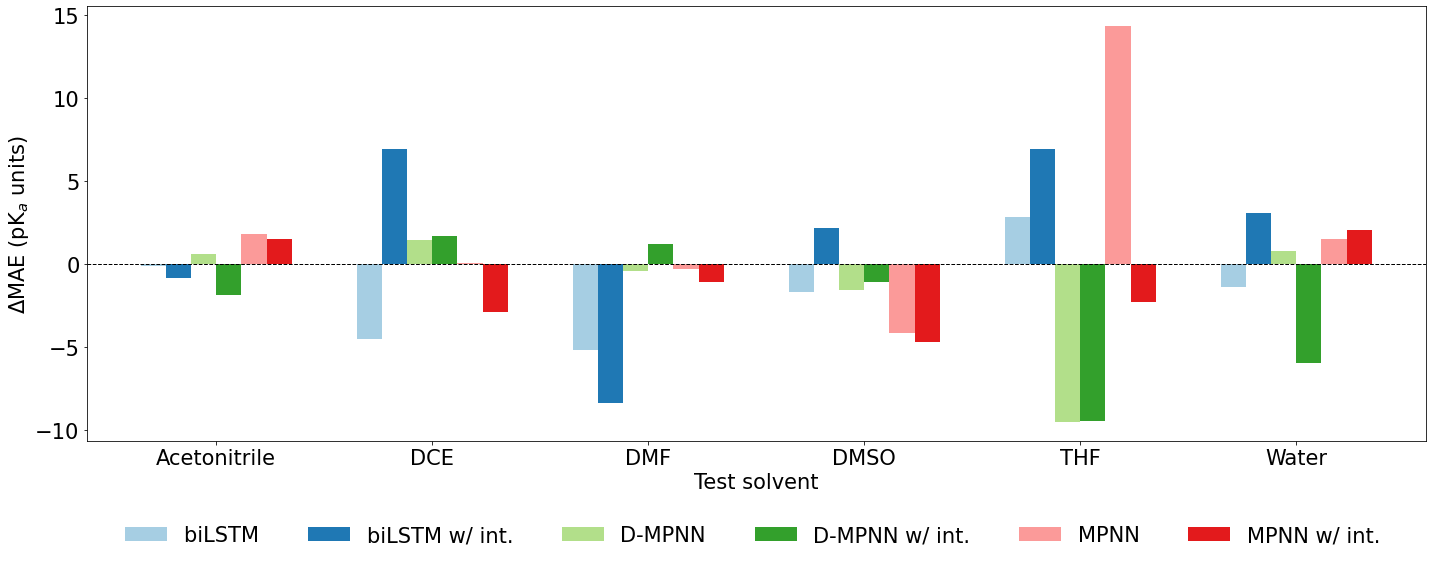

In [183]:
#LOSO
df = pd.read_csv('results/LOSO_test.csv')
df = df.replace({'_':' ','RNN':'biLSTM','DMPNN':'D-MPNN', 'with attention':'w/ int.', 'Water pKa':''}, regex=True)
solvent_name_key = {"CS(=O)C":"DMSO","CC#N":"Acetonitrile","C(CCl)Cl":"DCE","CN(C)C=O":"DMF","C1CCOC1":"THF","O":"Water"}
df = df.replace(solvent_name_key)

df_pivot = pd.pivot_table(df, values="relative MAE", index="LOSO solvent", columns="Model")
cols = list(df_pivot.columns.values)
cols = [col for col in cols if 'Gsolv' not in col]
df_pivot = df_pivot[sorted(cols, key=str.lower)]

colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
           '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#FAE318','#b15928']

ax = df_pivot.plot.bar(color=colours, width=0.7)
fig = ax.get_figure()
fig.set_size_inches(24, 8)
ax.set_xlabel("Test solvent")
ax.set_ylabel("$\Delta$MAE (pK$_a$ units)")
plt.xticks(rotation=0)

ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=False, ncol=6, frameon=False)
plt.savefig('TL_LOSO_water.pdf', bbox_inches='tight')
plt.show()

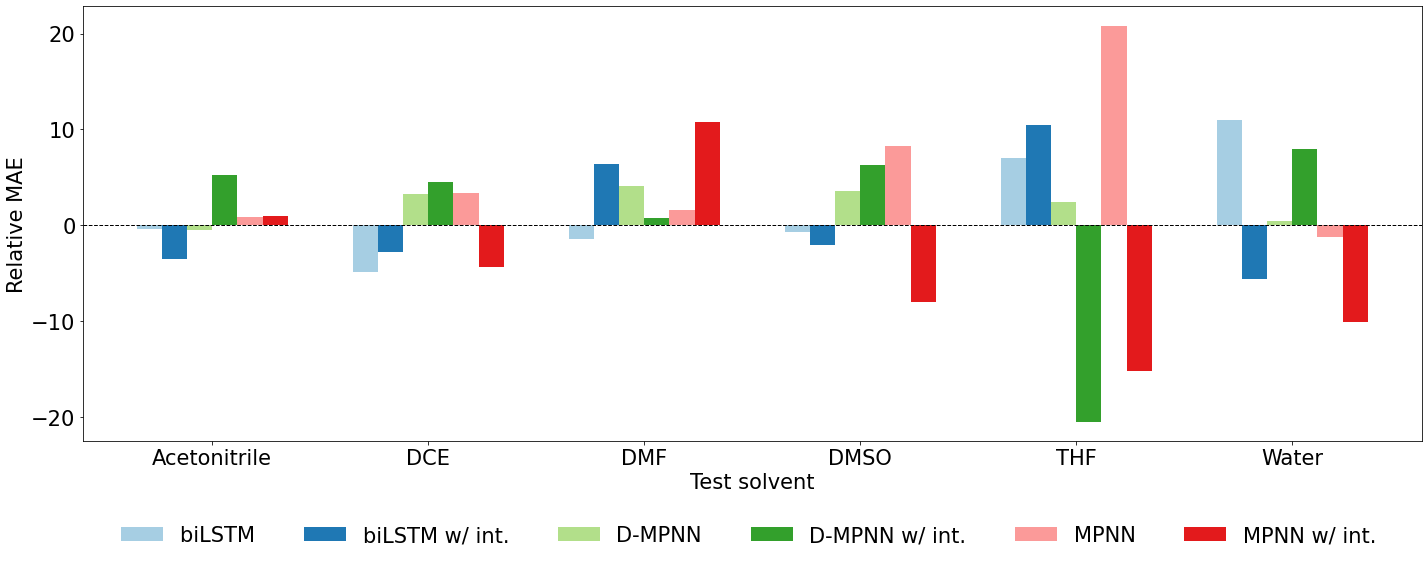

In [184]:
#LOSO
df = pd.read_csv('results/LOSO_test.csv')
df = df.replace({'_':' ','RNN':'biLSTM','DMPNN':'D-MPNN', 'with attention':'w/ int.', 'Gsolv':''}, regex=True)
solvent_name_key = {"CS(=O)C":"DMSO","CC#N":"Acetonitrile","C(CCl)Cl":"DCE","CN(C)C=O":"DMF","C1CCOC1":"THF","O":"Water"}
df = df.replace(solvent_name_key)

df_pivot = pd.pivot_table(df, values="relative MAE", index="LOSO solvent", columns="Model")
cols = list(df_pivot.columns.values)
cols = [col for col in cols if 'Water' not in col]
df_pivot = df_pivot[sorted(cols, key=str.lower)]

colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
           '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#FAE318','#b15928']

ax = df_pivot.plot.bar(color=colours, width=0.7)
fig = ax.get_figure()
fig.set_size_inches(24, 8)
ax.set_xlabel("Test solvent")
ax.set_ylabel("Relative MAE")
plt.xticks(rotation=0)

ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=False, ncol=6, frameon=False)
plt.savefig('TL_LOSO_G.pdf', bbox_inches='tight')
plt.show()

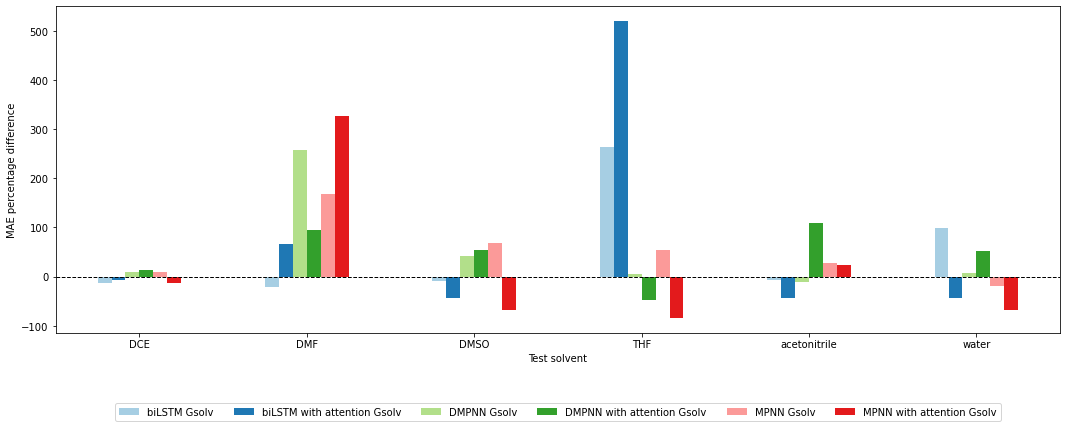

In [206]:
#LOSO
df = pd.read_csv('results/LOSO_test.csv')
df = df.replace({'RNN':'biLSTM'}, regex=True)
solvent_name_key = {"CS(=O)C":"DMSO","CC#N":"acetonitrile","C(CCl)Cl":"DCE","CN(C)C=O":"DMF","C1CCOC1":"THF","O":"water"}
df = df.replace(solvent_name_key)

df_pivot = pd.pivot_table(df, values="relative MAE %", index="LOSO solvent", columns="Model")
cols = list(df_pivot.columns.values)
cols = [col for col in cols if 'Gsolv' in col]
df_pivot = df_pivot[sorted(cols, key=str.lower)]

colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
           '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#FAE318','#b15928']

ax = df_pivot.plot.bar(color=colours, linewidth=5)
fig = ax.get_figure()
fig.set_size_inches(18, 6)
ax.set_xlabel("Test solvent")
ax.set_ylabel("MAE percentage difference")
plt.xticks(rotation=0)

ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=False, ncol=6)
plt.savefig('TL_LOSO_G_perc.png', bbox_inches='tight')
plt.show()

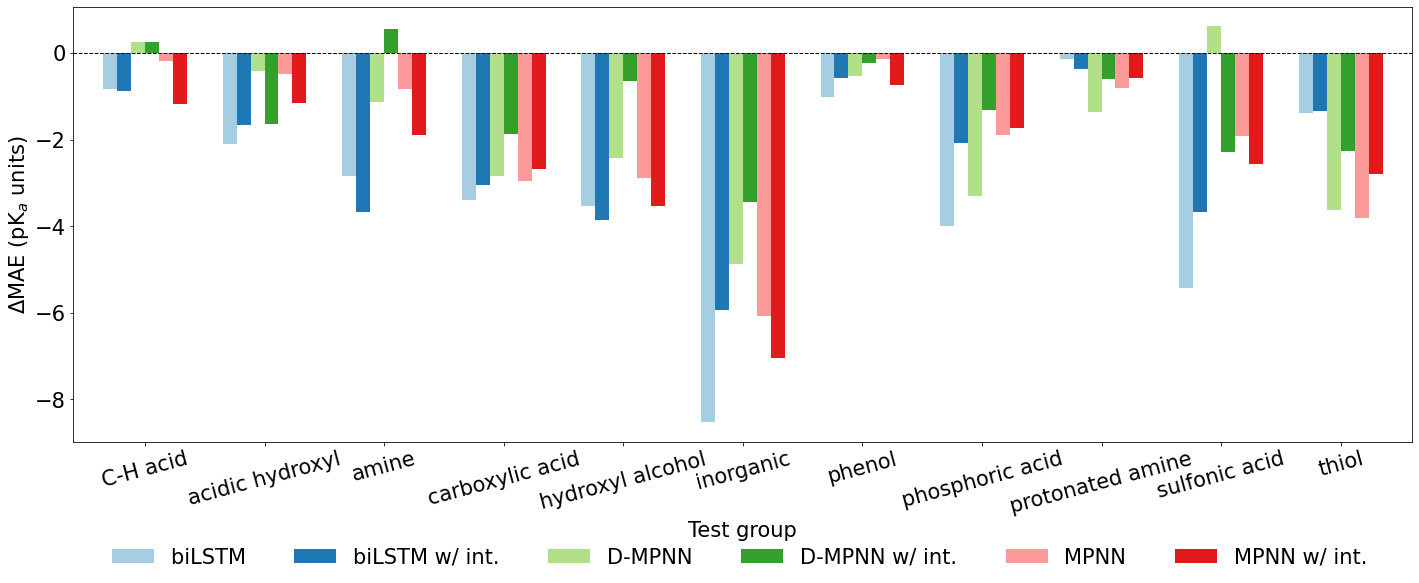

In [188]:
df = pd.read_csv('finalised_results/LOFO_test.csv')
df = df.replace({'_':' ','RNN':'biLSTM','DMPNN':'D-MPNN', 'with attention':'w/ int.','Water pKa':''}, regex=True)
df_pivot = pd.pivot_table(df, values="relative MAE", index="LOFO group", columns="Model")
cols = list(df_pivot.columns.values)
df_pivot = df_pivot[sorted(cols, key=str.lower)]

ax = df_pivot.plot.bar(color=colours, width=0.7)
fig = ax.get_figure()
fig.set_size_inches(24, 8)
ax.set_xlabel("Test group")
ax.set_ylabel("$\Delta$MAE (pK$_a$ units)")
plt.xticks(rotation=15) 

ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=False, shadow=False, ncol=6, frameon=False)
plt.savefig('TL_LOFO_rel.pdf', bbox_inches='tight')
plt.show()

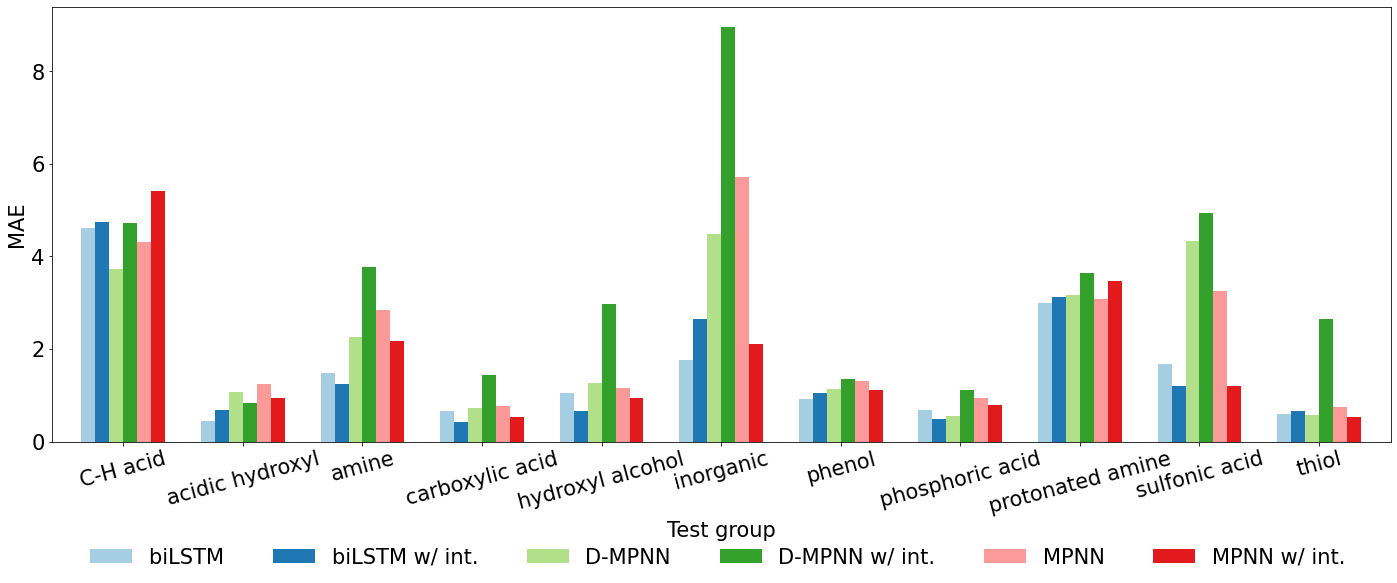

Model
biLSTM             1.533124
biLSTM w/ int.     1.534449
D-MPNN             2.117922
D-MPNN w/ int.     3.304530
MPNN               2.306854
MPNN w/ int.       1.746958
dtype: float64

In [187]:
df = pd.read_csv('finalised_results/LOFO_test.csv')
df = df.replace({'_':' ','RNN':'biLSTM','DMPNN':'D-MPNN', 'with attention':'w/ int.','Water pKa':''}, regex=True)
df_pivot = pd.pivot_table(df, values="MAE", index="LOFO group", columns="Model")
cols = list(df_pivot.columns.values)
df_pivot = df_pivot[sorted(cols, key=str.lower)]

ax = df_pivot.plot.bar(color=colours, width=0.7)
fig = ax.get_figure()
fig.set_size_inches(24, 8)
ax.set_xlabel("Test group")
ax.set_ylabel("MAE")
plt.xticks(rotation=15) 

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=False, shadow=False, ncol=6, frameon=False)
plt.savefig('TL_LOFO_raw.pdf', bbox_inches='tight')
plt.show()

df_pivot.mean(axis=0)

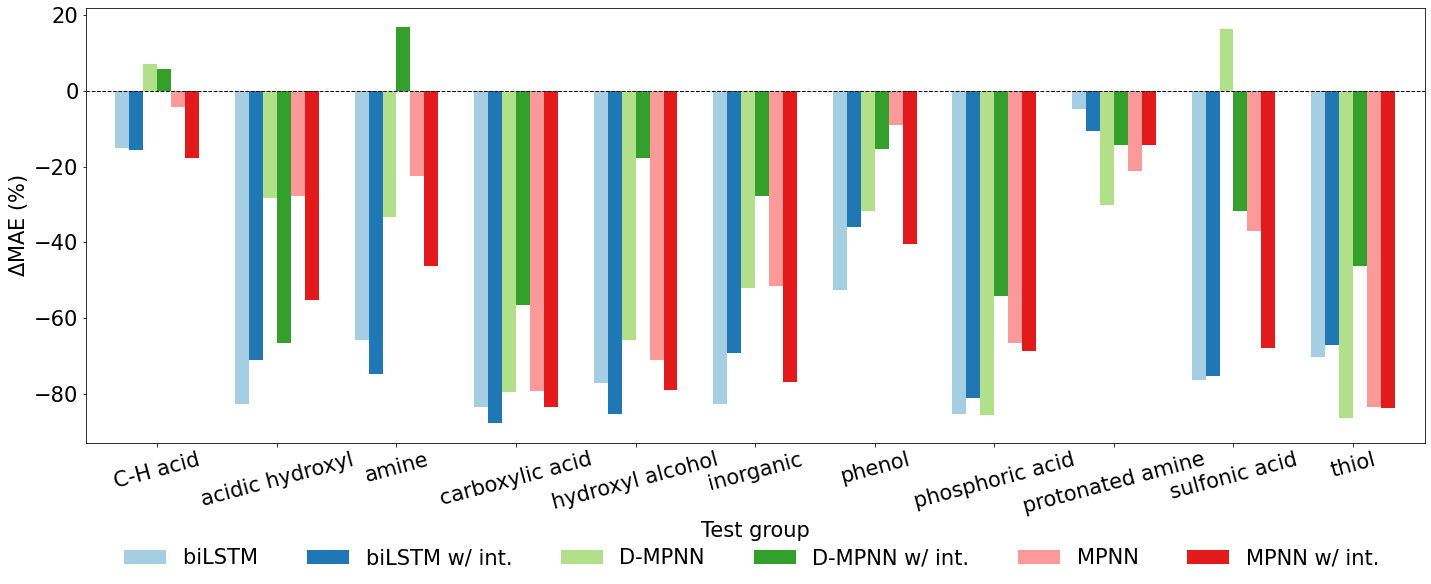

Model
biLSTM            -63.349419
biLSTM w/ int.    -61.300401
D-MPNN            -42.708826
D-MPNN w/ int.    -28.002773
MPNN              -43.092024
MPNN w/ int.      -57.670553
dtype: float64

In [189]:
df = pd.read_csv('finalised_results/LOFO_test.csv')
df = df.replace({'_':' ','RNN':'biLSTM','DMPNN':'D-MPNN', 'with attention':'w/ int.','Water pKa':''}, regex=True)
df_pivot = pd.pivot_table(df, values="relative MAE %", index="LOFO group", columns="Model")
cols = list(df_pivot.columns.values)
df_pivot = df_pivot[sorted(cols, key=str.lower)]

ax = df_pivot.plot.bar(color=colours, width=0.7)
fig = ax.get_figure()
fig.set_size_inches(24, 8)
ax.set_xlabel("Test group")
ax.set_ylabel("$\Delta$MAE (%)")
plt.xticks(rotation=15) 

ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=False, shadow=False, ncol=6, frameon=False)
plt.savefig('TL_LOFO_perc.pdf', bbox_inches='tight')
plt.show()

df_pivot.mean()

In [51]:
import sys
sys.path.append('../')
from modules.data import data_maker
from modules.RNN import double_RNN
from modules.fit import Model, fit, predict, mae, rmse, load_exp
from modules.data import pka_scaler
from modules.myhyperopt import hyperopt_func
from modules.MPNN import double_MPNN

/Users/u6676643/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [52]:
DMPNN = Model(name='DMPNN',
              model=double_MPNN(MP_depth=3, MP_hidden=256, NN_depth=2, NN_hidden=512, activation='ReLU', 
                                atom_messages=False, dropout=0, interaction=None, readout='sum'),
              lr=0.001,
              batch_size=64,
              model_type='torch',
              data_type='graphs')
DMPNN_att = Model(name='DMPNN with attention',
              model=double_MPNN(MP_depth=4, MP_hidden=128, NN_depth=4, NN_hidden=64, activation='ELU', 
                                atom_messages=False, dropout=0, interaction='tanh', readout='mean'),
              lr=0.001,
              batch_size=64,
              model_type='torch',
              data_type='graphs')
MPNN = Model(name='MPNN',
             model=double_MPNN(MP_depth=3, MP_hidden=256, NN_depth=2, NN_hidden=512, activation='LeakyReLU', 
                                  atom_messages=True, dropout=0, interaction=None, readout='sum'),
             lr=0.001,
             batch_size=64,
             model_type='torch',
             data_type='graphs')
MPNN_att = Model(name='MPNN with attention',
             model=double_MPNN(MP_depth=2, MP_hidden=64, NN_depth=4, NN_hidden=512, activation='ReLU', 
                                  atom_messages=True, dropout=0, interaction='tanh', readout='max'),
             lr=0.001,
             batch_size=64,
             model_type='torch',
             data_type='graphs')
RNN = Model(name='RNN',
            model=double_RNN(NN_depth=3, NN_hidden=512, RNN_hidden=512, activation='ReLU', dropout=0.3,
                             features=300, interaction=None, readout='max'),
            lr=0.001,
            batch_size=32,
            model_type='torch',
            data_type='sentences')
RNN_att = Model(name='RNN with attention',
                model=double_RNN(NN_depth=1, NN_hidden=1024, RNN_hidden=512, activation='PReLU', dropout=0.1,
                                 features=300, interaction='exp', readout='max'),
                lr=0.001,
                batch_size=32,
                model_type='torch',
                data_type='sentences')
models = [DMPNN, DMPNN_att, MPNN, MPNN_att, RNN, RNN_att]

In [53]:
data = pd.read_csv('../data/full_pka_data.csv')
solute = data['Solute SMILES'].tolist()
solvent = data['Solvent SMILES'].tolist()
pka = data['pKa (avg)'].tolist()
acids = data['Acid type'].tolist()
solvent_names = data['Solvent name'].tolist()
data_size = len(solute)

indices = list(range(data_size))
CV_ids, holdout_ids, _, _ = train_test_split(indices, solvent, test_size=0.2, random_state=1, stratify=solvent)
datasets = data_maker(solute, solvent, pka)

In [54]:
#loading models
for m in models:
    print(m.name)
    data = datasets[m.data_type]
    load_exp(m, "Holdout test", data, CV_ids)

DMPNN
DMPNN with attention
MPNN
MPNN with attention
RNN
RNN with attention


DMPNN


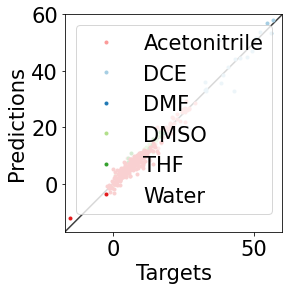

DMPNN with attention


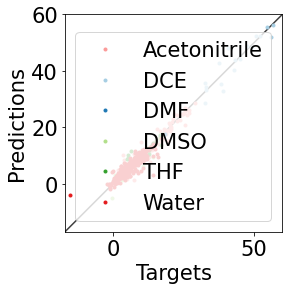

MPNN


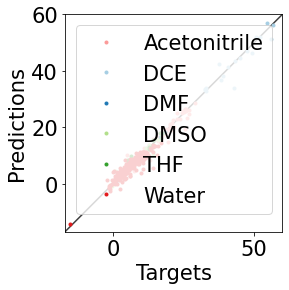

MPNN with attention


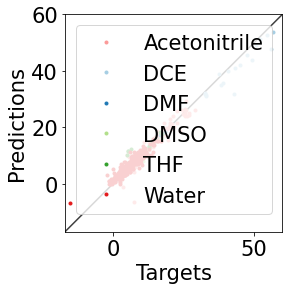

RNN


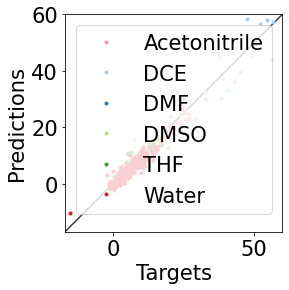

RNN with attention


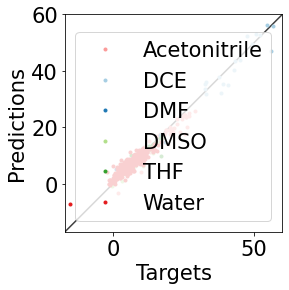

In [164]:
##qqplots solvent
solv_set = ['CC#N','C(CCl)Cl','CN(C)C=O','CS(=O)C','C1CCOC1','O']
solvent_name_key = {"CS(=O)C":"DMSO","CC#N":"Acetonitrile","C(CCl)Cl":"DCE","CN(C)C=O":"DMF","C1CCOC1":"THF","O":"Water"}
solv_names = ["Water","DCE","DMF","DMSO","THF","Acetonitrile"]

colour_key = {'DCE':'#a6cee3','DMF':'#1f78b4','DMSO':'#b2df8a','THF':'#33a02c','Acetonitrile':'#fb9a99','Water':'#e31a1c'}
solv_ids = ddict()
solv_MAEs = ddict(list)
for solv in solv_set:
    solv_ids[solv] = [i for i,x in enumerate(solvent) if x == solv and i in holdout_ids]
    solv_MAEs['solvent'].append(solvent_name_key[solv])
for m in models:
    print(m.name)
    data = datasets[m.data_type]
#    targets, outputs = predict(m, "Holdout test", data, solv_ids['O'])
#    solv_name = solvent_name_key['O']
#    plt.plot(targets, outputs, 'o', markersize=3,label=solv_name, c=colour_key[solv_name])
#    print('water', mae(targets,outputs),rmse(targets,outputs))
    for solv in solv_set:
#        if solv not in 'O':
            targets, outputs = predict(m, "Holdout test", data, solv_ids[solv])
            solv_name = solvent_name_key[solv]
            plt.plot(targets, outputs, 'o', markersize=3,label=solv_name, c=colour_key[solv_name])
#            print(solv_name, mae(targets,outputs),rmse(targets,outputs))
            solv_MAEs[m.name].append(mae(targets,outputs))

    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    lims = [-17,60]
    plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    axes=plt.gca()
    axes.set_aspect('equal')
    axes.set_xlim(lims)
    axes.set_ylim(lims)
    axes.legend()
    plt.show()

     biLSTM  biLSTM w/ int.    D-MPNN  D-MPNN w/ int.      MPNN  MPNN w/ int.  \
0  1.667741        1.538478  1.182717        1.451471  1.033367      1.653514   
1  4.816244        2.619957  2.595598        2.425100  1.802037      2.857018   
2  1.087054        2.619293  0.331349        0.366340  0.246550      0.506383   
3  1.437160        0.993019  0.909794        1.190145  0.913960      0.794949   
4  2.060256        1.493623  1.284213        2.029495  1.386532      2.485214   
5  1.103421        1.328457  0.737058        0.840024  0.711593      1.005032   

        solvent  
0  Acetonitrile  
1           DCE  
2           DMF  
3          DMSO  
4           THF  
5         Water  


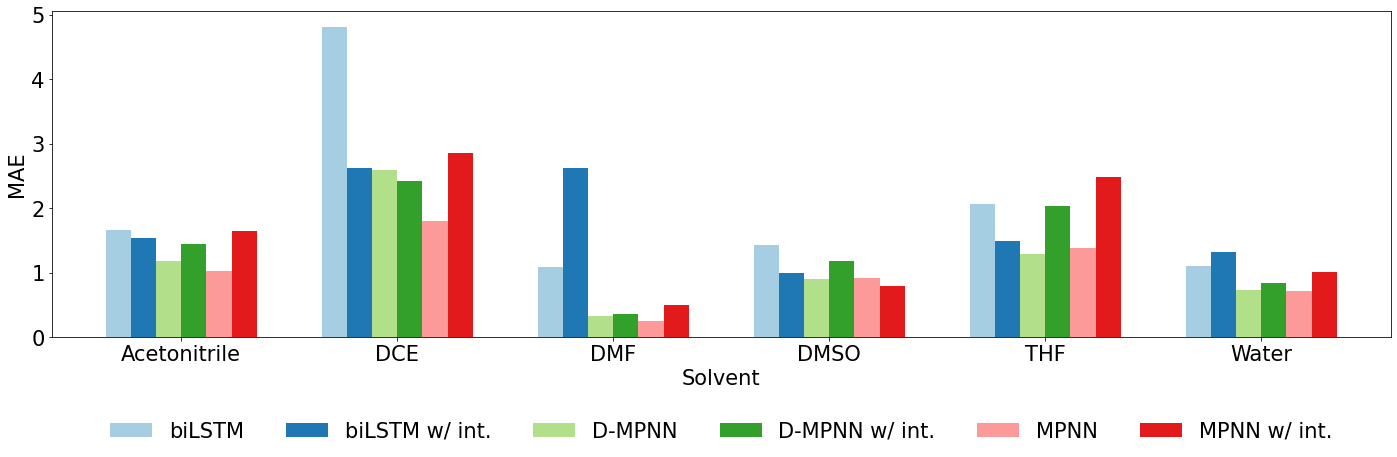

[0, 70, 16, 104, 52, 0]
[0, 18, 4, 26, 13, 0]


In [181]:
solv_MAEs = pd.DataFrame(solv_MAEs)

df_pivot = solv_MAEs
df_pivot = df_pivot.rename(columns = 
                           {'DMPNN':'D-MPNN','RNN':'biLSTM', 'RNN with attention':'biLSTM w/ int.', 
                            'DMPNN with attention':'D-MPNN w/ int.', 'MPNN with attention':'MPNN w/ int.'})
cols = list(df_pivot.columns.values)
df_pivot = df_pivot[sorted(cols, key=str.lower)]
print(df_pivot)

colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
           '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#FAE318','#b15928']

ax = df_pivot.plot.bar(x='solvent',color=colours, width=0.7, legend=False)
fig = ax.get_figure()
fig.set_size_inches(24,6)
ax.set_xlabel("Solvent")
ax.set_ylabel("MAE")
plt.xticks(rotation=0) 

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=False, shadow=False, ncol=6, frameon=False)
plt.savefig('TL_holdout_solvents.pdf', bbox_inches='tight')
plt.show()
train_solv = [solvent_names[i] for i in CV_ids]
test_solv = [solvent_names[i] for i in holdout_ids]
train_counts = [train_solv.count(name) for name in solv_MAEs['solvent']]
test_counts = [test_solv.count(name) for name in solv_MAEs['solvent']]
print(train_counts)
print(test_counts)

     D-MPNN  D-MPNN w/ int.      MPNN  MPNN w/ int.    biLSTM  biLSTM w/ int.  \
0 -0.227724       -0.345701 -0.635877      0.067026 -0.732072       -0.464028   
1  0.373851       -0.218325 -0.430975      0.205878 -0.890359       -0.520236   
2 -0.788616       -0.476661 -0.518921     -0.581308 -0.775360        1.288784   
3  0.233053        0.031973 -0.350492     -0.174834 -0.088890       -0.076208   
4 -0.021696        0.531210 -0.735438      1.274526  0.530026       -0.605067   
5 -0.029018       -0.321396 -0.252934     -0.031286 -0.128390        0.285516   

   solvent  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
5      NaN  


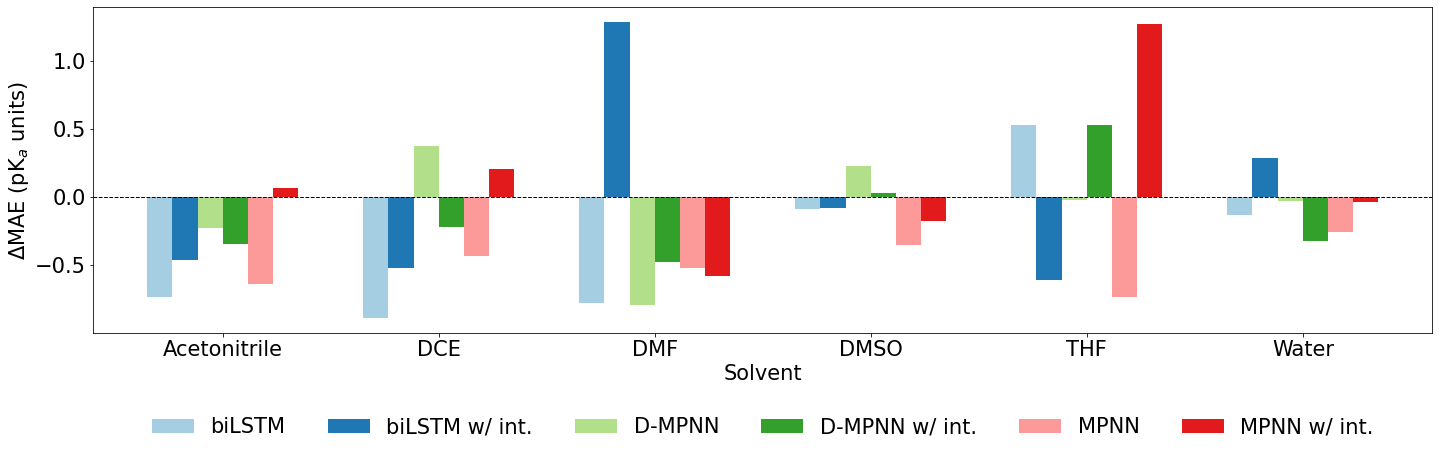

In [180]:
df_old = pd.read_csv('../holdout_solv.csv')
df_old = df_old.iloc[:,1:8]
df_rel = df_pivot.iloc[:,0:7]-df_old.iloc[:,1:8]
print(df_rel)
df_rel['solvent'] = df_pivot['solvent']

cols = list(df_rel.columns.values)
df_rel = df_rel[sorted(cols, key=str.lower)]

ax = df_rel.plot.bar(x='solvent',color=colours, width=0.7, legend=False)
fig = ax.get_figure()
fig.set_size_inches(24,6)
ax.set_xlabel("Solvent")
ax.set_ylabel("$\Delta$MAE (pK$_a$ units)")
plt.xticks(rotation=0) 

ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=False, shadow=False, ncol=6, frameon=False)
plt.savefig('TL_holdout_solvent_rel.pdf', bbox_inches='tight')
plt.show()

      D-MPNN  D-MPNN w/ int.  FNN w/ ECFP  FNN w/ desc.  MPNN  MPNN w/ int.  \
0 -16.145561      -19.235840          NaN           NaN   NaN           NaN   
1  16.826895       -8.259168          NaN           NaN   NaN           NaN   
2 -70.414364      -56.543311          NaN           NaN   NaN           NaN   
3  34.437536        2.760613          NaN           NaN   NaN           NaN   
4  -1.661342       35.454531          NaN           NaN   NaN           NaN   
5  -3.787857      -27.672679          NaN           NaN   NaN           NaN   

   Unnamed: 0     biLSTM  biLSTM w/ int.  solvent  
0         NaN -30.258742      -19.622389      NaN  
1         NaN -22.392383      -26.061649      NaN  
2         NaN -50.264401       91.573997      NaN  
3         NaN -30.721580       14.927516      NaN  
4         NaN  29.671304      -25.638602      NaN  
5         NaN  -7.078800       27.832586      NaN  


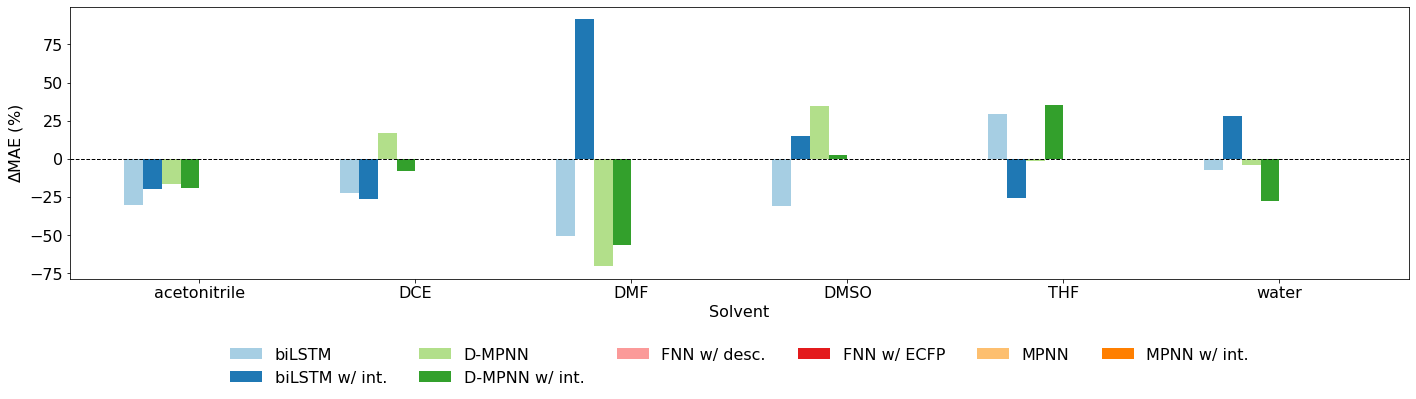

In [114]:
df_perc = df_rel.div(df_old) *100
print(df_perc)
df_perc['solvent'] = df_pivot['solvent']

cols = list(df_perc.columns.values)
cols = [col for col in cols if 'Un' not in col]
df_perc = df_perc[sorted(cols, key=str.lower)]

ax = df_perc.plot.bar(x='solvent',color=colours, width=0.7, legend=False)
fig = ax.get_figure()
fig.set_size_inches(24,5)
ax.set_xlabel("Solvent")
ax.set_ylabel("$\Delta$MAE (%)")
plt.xticks(rotation=0) 

ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=False, shadow=False, ncol=6, frameon=False)
plt.savefig('TL_holdout_solvent_rel_p.pdf', bbox_inches='tight')
plt.show()

DMPNN


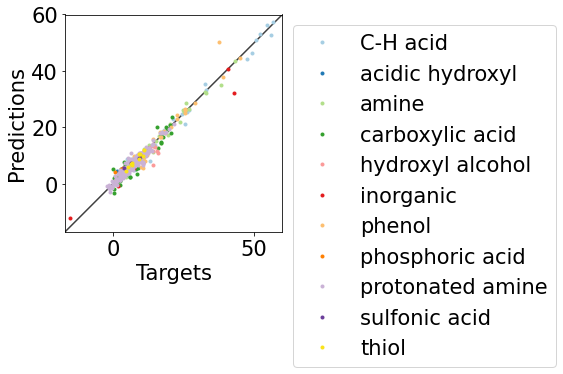

DMPNN with attention


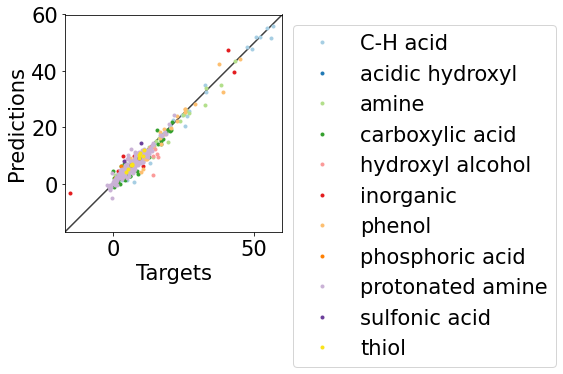

MPNN


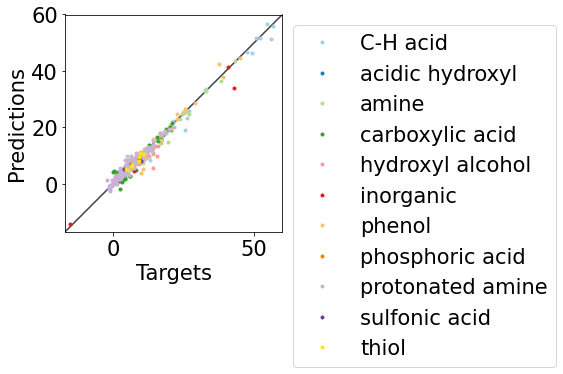

MPNN with attention


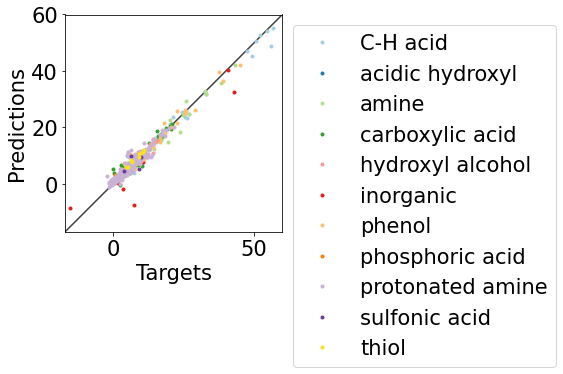

RNN


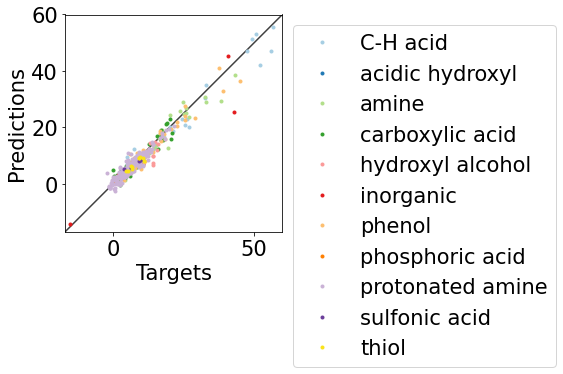

RNN with attention


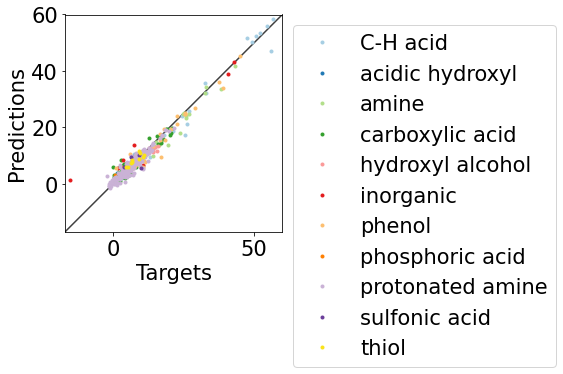

In [167]:
##qqplots acids
acid_set = ['C-H acid', 'acidic hydroxyl', 'amine', 'carboxylic acid', 'hydroxyl alcohol', 'inorganic', 'phenol', 'phosphoric acid', 'protonated amine', 'sulfonic acid', 'thiol']
acid_ids = ddict()
for acid in acid_set:
    acid_ids[acid] = [i for i,x in enumerate(acids) if x == acid and i in holdout_ids]
    
acid_MAEs = ddict(list)
acid_MAEs['acid type'] = acid_set
for m in models:
    print(m.name)
    data = datasets[m.data_type]
    i=0
    for acid in acid_set:
        targets, outputs = predict(m, "Holdout test", data, acid_ids[acid])
        plt.plot(targets, outputs, 'o', markersize=3,label=acid, c=colours[i])
        acid_MAEs[m.name].append(mae(targets,outputs))
        i+=1

    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    lims = [-17,60]
    plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    axes=plt.gca()
    axes.set_aspect('equal')
    axes.set_xlim(lims)
    axes.set_ylim(lims)
    axes.legend(bbox_to_anchor=(1,1))
    plt.show()

           acid type    biLSTM  biLSTM w/ int.    D-MPNN  D-MPNN w/ int.  \
0           C-H acid  3.054614        2.102955  1.548914        1.726239   
1    acidic hydroxyl  0.897881        2.098400  1.396886        0.796550   
2              amine  1.480201        1.207624  0.859456        0.884704   
3    carboxylic acid  1.109955        1.348818  1.083092        0.996323   
4   hydroxyl alcohol  2.520077        1.607107  1.683495        2.404986   
5          inorganic  4.032133        5.438084  3.364658        5.489548   
6             phenol  1.341650        1.075167  0.812835        0.934971   
7    phosphoric acid  0.835814        2.855412  3.045890        2.433084   
8   protonated amine  0.895144        0.843697  0.642713        0.781914   
9      sulfonic acid  1.098450        2.566110  0.643519        2.336711   
10             thiol  0.773123        1.164394  0.651280        0.532863   

        MPNN  MPNN w/ int.  
0   1.633695      1.578123  
1   1.014712      1.043944  


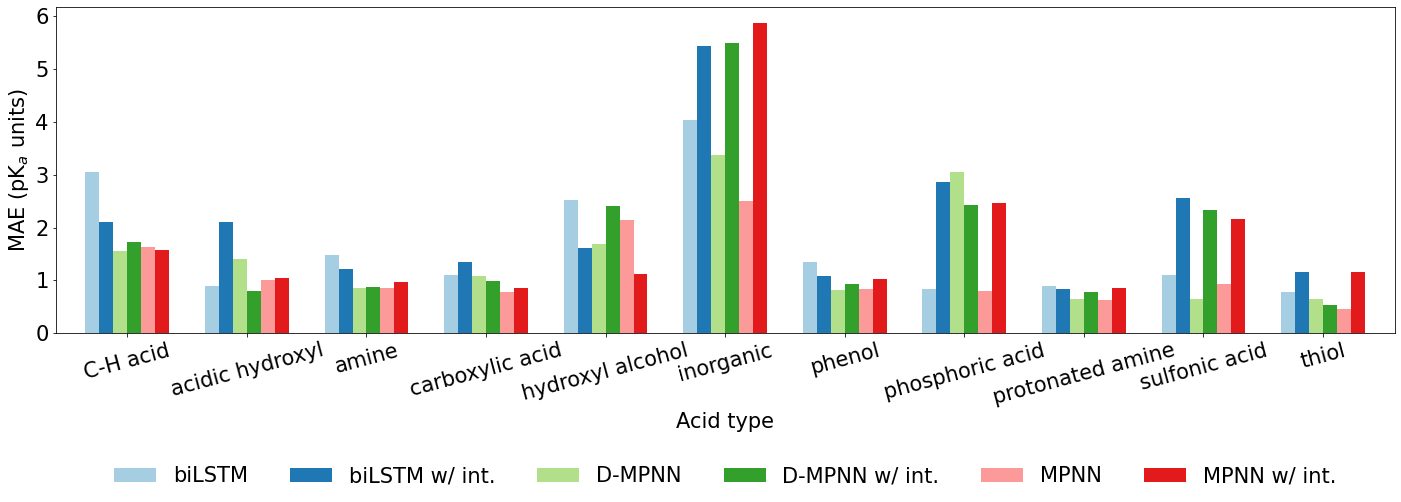

[117, 18, 237, 367, 52, 24, 303, 8, 1398, 17, 36]
[28, 3, 57, 91, 14, 7, 93, 2, 336, 4, 10]


In [177]:
df_pivot = pd.DataFrame(acid_MAEs)

df_pivot = df_pivot.rename(columns = 
                           {'DMPNN':'D-MPNN','RNN':'biLSTM', 'RNN with attention':'biLSTM w/ int.', 
                            'DMPNN with attention':'D-MPNN w/ int.', 'MPNN with attention':'MPNN w/ int.'})
cols = list(df_pivot.columns.values)
df_pivot = df_pivot[sorted(cols, key=str.lower)]
print(df_pivot)

colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
           '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#FAE318','#b15928']

ax = df_pivot.plot.bar(x='acid type',color=colours, width=0.7)
fig = ax.get_figure()
fig.set_size_inches(24,6)
ax.set_xlabel("Acid type")
ax.set_ylabel("MAE (pK$_a$ units)")
plt.xticks(rotation=15) 

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), fancybox=False, shadow=False, ncol=6, frameon=False)
plt.savefig('TL_holdout_acid.pdf', bbox_inches='tight')
plt.show()
train_acids = [acids[i] for i in CV_ids]
test_acids = [acids[i] for i in holdout_ids]
train_counts = [train_acids.count(name) for name in acid_set]
test_counts = [test_acids.count(name) for name in acid_set]
print(train_counts)
print(test_counts)

In [169]:
df_old = pd.read_csv('../holdout_acid.csv')
df_old = df_old.iloc[:,1:8]
df_rel = df_pivot.iloc[:,0:7]-df_old.iloc[:,1:8]
df_rel['acid type'] = df_pivot['acid type']

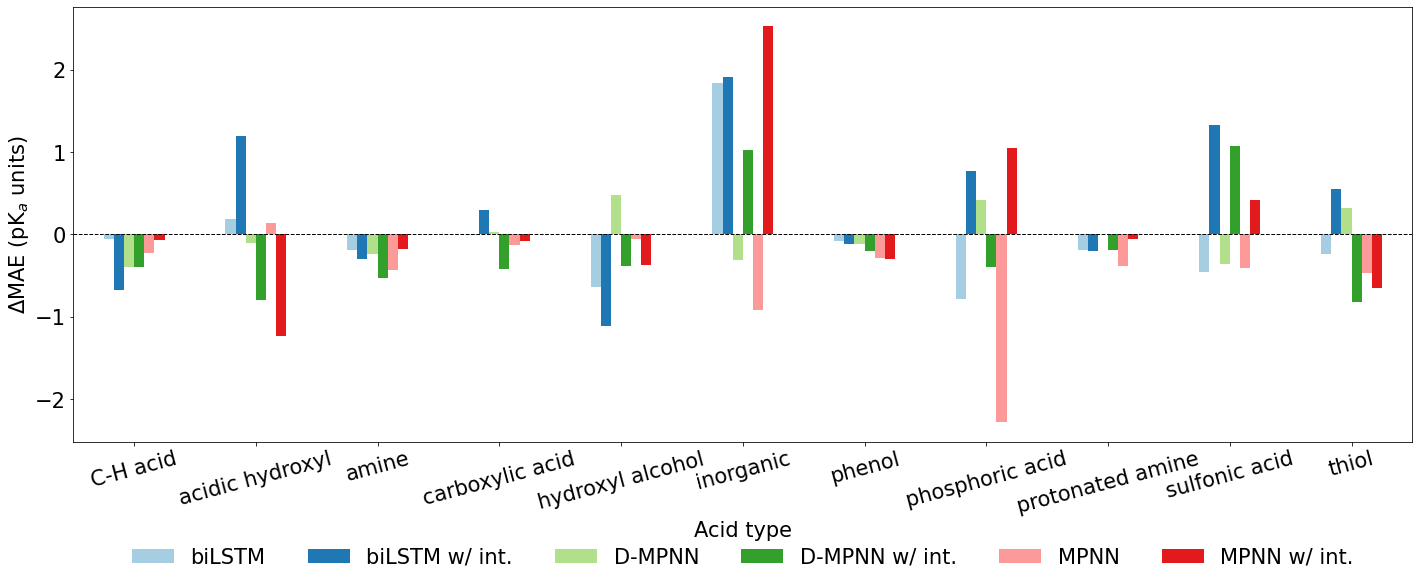

[117, 18, 237, 367, 52, 24, 303, 8, 1398, 17, 36]
[28, 3, 57, 91, 14, 7, 93, 2, 336, 4, 10]


In [176]:
cols = list(df_rel.columns.values)
df_rel = df_rel[sorted(cols, key=str.lower)]

ax = df_rel.plot.bar(x='acid type',color=colours, linewidth=5)
fig = ax.get_figure()
fig.set_size_inches(24,8)
ax.set_xlabel("Acid type")
ax.set_ylabel("$\Delta$MAE (pK$_a$ units)")
plt.xticks(rotation=15) 

ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=False, shadow=False, ncol=6, frameon=False)
plt.savefig('TL_holdout_acid_rel.pdf', bbox_inches='tight')
plt.show()
train_acids = [acids[i] for i in CV_ids]
test_acids = [acids[i] for i in holdout_ids]
train_counts = [train_acids.count(name) for name in acid_set]
test_counts = [test_acids.count(name) for name in acid_set]
print(train_counts)
print(test_counts)

       biLSTM  biLSTM with interaction     D-MPNN  D-MPNN with interaction  \
0   -6.434059               -22.596955 -20.191811               -18.845266   
1  -14.491708                84.076484  -6.668487               -49.905087   
2   -7.037742               -13.906410 -21.374326               -37.293790   
3   -5.922818                28.365415   3.272375               -29.382434   
4  -25.281926               -39.166301  40.299398               -13.880424   
5   33.912892                64.446004  -8.493054                22.907013   
6  -15.893081               -13.338321 -12.704476               -18.141206   
7   15.307768                19.491078  16.012338               -14.168565   
8  -12.177599               -22.071083   0.596286               -19.894378   
9  -23.852689                59.931883 -35.989629                85.134800   
10  -9.491601                95.900959  98.743640               -60.746227   

         MPNN  MPNN with interaction  
0  -12.083370           

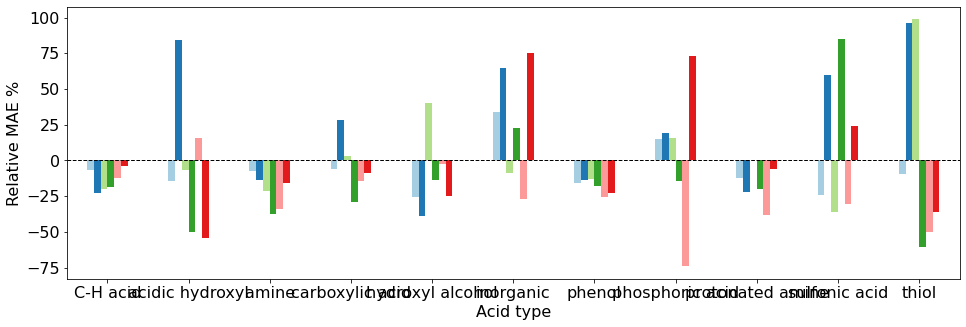

In [108]:
df_perc = df_rel.iloc[:,0:6].div(df_old.iloc[:,1:7]) *100
print(df_perc)
df_perc['acid type'] = df_pivot['acid type']

cols = list(df_perc.columns.values)
df_perc = df_perc[sorted(cols, key=str.lower)]

ax = df_perc.plot.bar(x='acid type',color=colours, linewidth=5, legend=False)
fig = ax.get_figure()
fig.set_size_inches(16,5)
ax.set_xlabel("Acid type")
ax.set_ylabel("Relative MAE %")
plt.xticks(rotation=0) 

ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.savefig('TL_holdout_acid_perc.png', bbox_inches='tight')
plt.show()